In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [5]:
health_df = pd.read_csv("Global Health Statistics.csv")
health_df.head()

,country,year,disease_name,disease_category,prevalence_rate,incidence_rate,mortality_rate,age_group,gender,population_affected,...,hospital_beds_per_1000,treatment_type,average_treatment_cost_usd,availability_of_vaccines_treatment,recovery_rate,dalys,improvement_in_5_years,per_capita_income_usd,education_index,urbanization_rate
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [218]:
respiratory_health_df = health_df.loc[(health_df['disease_name'] == 'Influenza') & (health_df['country'] == 'USA')]
respiratory_health_df

,country,year,disease_name,disease_category,prevalence_rate,incidence_rate,mortality_rate,age_group,gender,population_affected,...,hospital_beds_per_1000,treatment_type,average_treatment_cost_usd,availability_of_vaccines_treatment,recovery_rate,dalys,improvement_in_5_years,per_capita_income_usd,education_index,urbanization_rate
94,USA,2020,Influenza,Metabolic,8.06,0.40,2.78,61+,Male,871292,...,8.16,Therapy,49671,Yes,58.75,1458,1.23,31474,0.73,55.38
463,USA,2020,Influenza,Autoimmune,18.27,11.01,3.30,19-35,Other,739968,...,4.73,Therapy,30409,No,95.14,4073,2.64,21491,0.76,79.27
534,USA,2008,Influenza,Cardiovascular,18.88,14.73,3.50,19-35,Male,126959,...,6.75,Surgery,32087,No,77.93,2187,3.07,83753,0.77,87.76
856,USA,2013,Influenza,Bacterial,13.26,9.48,5.63,36-60,Other,776469,...,2.53,Medication,49441,Yes,76.81,1554,4.61,92519,0.71,88.93
1213,USA,2016,Influenza,Genetic,16.95,4.78,0.21,0-18,Male,756414,...,2.60,Vaccination,31520,No,79.56,3155,0.70,39725,0.68,32.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998026,USA,2018,Influenza,Neurological,2.08,0.15,0.99,61+,Male,131825,...,9.99,Medication,44007,Yes,76.00,1193,3.52,31077,0.47,20.42
998522,USA,2013,Influenza,Cardiovascular,18.12,13.09,7.03,19-35,Female,724044,...,1.64,Vaccination,48768,Yes,93.73,4800,0.28,35677,0.89,74.28
998877,USA,2011,Influenza,Genetic,12.43,4.86,9.12,19-35,Male,279695,...,0.98,Vaccination,13793,No,97.65,598,8.18,95708,0.60,34.73
999252,USA,2012,Influenza,Chronic,12.71,1.41,1.01,0-18,Female,941623,...,7.01,Vaccination,2074,Yes,80.72,3734,5.32,6467,0.88,83.22


In [6]:
respiratory_health_df = respiratory_health_df.round()

NameError: name 'respiratory_health_df' is not defined

In [7]:
health_df_rounded = health_df.round()
health_df_rounded

,country,year,disease_name,disease_category,prevalence_rate,incidence_rate,mortality_rate,age_group,gender,population_affected,...,hospital_beds_per_1000,treatment_type,average_treatment_cost_usd,availability_of_vaccines_treatment,recovery_rate,dalys,improvement_in_5_years,per_capita_income_usd,education_index,urbanization_rate
0,Italy,2013,Malaria,Respiratory,1.0,2.0,8.0,0-18,Male,471007,...,8.0,Medication,21064,No,92.0,4493,2.0,16886,1.0,86.0
1,France,2002,Ebola,Parasitic,12.0,9.0,9.0,61+,Male,634318,...,5.0,Surgery,47851,Yes,77.0,2366,5.0,80639,1.0,46.0
2,Turkey,2015,COVID-19,Genetic,1.0,2.0,6.0,36-60,Male,154878,...,3.0,Vaccination,27834,Yes,99.0,41,6.0,12245,0.0,40.0
3,Indonesia,2011,Parkinson's Disease,Autoimmune,5.0,6.0,4.0,0-18,Other,446224,...,8.0,Surgery,144,Yes,67.0,3201,2.0,49336,0.0,58.0
4,Italy,2013,Tuberculosis,Genetic,1.0,14.0,7.0,61+,Male,472908,...,6.0,Medication,8908,Yes,50.0,2832,7.0,47701,0.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Saudi Arabia,2021,Parkinson's Disease,Infectious,5.0,5.0,10.0,0-18,Female,119332,...,4.0,Vaccination,4528,Yes,92.0,1024,4.0,29335,1.0,28.0
999996,Saudi Arabia,2013,Malaria,Respiratory,0.0,2.0,1.0,0-18,Female,354927,...,6.0,Surgery,20686,No,84.0,202,8.0,30752,0.0,78.0
999997,USA,2016,Zika,Respiratory,13.0,14.0,2.0,19-35,Other,807915,...,8.0,Therapy,18807,No,87.0,3338,7.0,62897,1.0,47.0
999998,Nigeria,2020,Asthma,Chronic,2.0,15.0,5.0,61+,Female,385896,...,7.0,Medication,21033,Yes,62.0,4806,4.0,98189,1.0,35.0


In [21]:
health_df_rounded.describe()

,year,prevalence_rate,incidence_rate,mortality_rate,population_affected,healthcare_access,doctors_per_1000,hospital_beds_per_1000,average_treatment_cost_usd,recovery_rate,dalys,improvement_in_5_years,per_capita_income_usd,education_index,urbanization_rate
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.048144,7.554884,5.050824,500735.427363,74.988546,2.774788,5.258746,25010.313665,74.497563,2499.144809,5.002752,50311.099835,0.789879,54.985499
std,7.217287,5.755168,4.318598,2.888854,288660.116648,14.442883,1.314753,2.751443,14402.279227,14.160839,1443.923798,2.917840,28726.959359,0.407395,20.218371
min,2000.000000,0.000000,0.000000,0.000000,1000.000000,50.000000,0.000000,0.000000,100.000000,50.000000,1.000000,0.000000,500.000000,0.000000,20.000000
25%,2006.000000,5.000000,4.000000,3.000000,250491.250000,62.000000,2.000000,3.000000,12538.000000,62.000000,1245.000000,2.000000,25457.000000,1.000000,37.000000
50%,2012.000000,10.000000,8.000000,5.000000,501041.000000,75.000000,3.000000,5.000000,24980.000000,74.000000,2499.000000,5.000000,50372.000000,1.000000,55.000000
75%,2018.000000,15.000000,11.000000,8.000000,750782.000000,87.000000,4.000000,8.000000,37493.000000,87.000000,3750.000000,8.000000,75195.000000,1.000000,73.000000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,1.000000,90.000000


In [22]:
health_df_rounded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   country                             1000000 non-null  object 
 1   year                                1000000 non-null  int64  
 2   disease_name                        1000000 non-null  object 
 3   disease_category                    1000000 non-null  object 
 4   prevalence_rate                     1000000 non-null  float64
 5   incidence_rate                      1000000 non-null  float64
 6   mortality_rate                      1000000 non-null  float64
 7   age_group                           1000000 non-null  object 
 8   gender                              1000000 non-null  object 
 9   population_affected                 1000000 non-null  int64  
 10  healthcare_access                   1000000 non-null  float64
 11  doctors_per_

In [8]:
health_df_rounded.columns

Index(['country', 'year', 'disease_name', 'disease_category',
       'prevalence_rate', 'incidence_rate', 'mortality_rate', 'age_group',
       'gender', 'population_affected', 'healthcare_access',
       'doctors_per_1000', 'hospital_beds_per_1000', 'treatment_type',
       'average_treatment_cost_usd', 'availability_of_vaccines_treatment',
       'recovery_rate', 'dalys', 'improvement_in_5_years',
       'per_capita_income_usd', 'education_index', 'urbanization_rate'],
      dtype='object')

In [9]:
health_df_rounded.nunique()

country                                   20
year                                      25
disease_name                              20
disease_category                          11
prevalence_rate                           21
incidence_rate                            16
mortality_rate                            11
age_group                                  4
gender                                     3
population_affected                   632061
healthcare_access                         51
doctors_per_1000                           6
hospital_beds_per_1000                    11
treatment_type                             4
average_treatment_cost_usd             49901
availability_of_vaccines_treatment         2
recovery_rate                             50
dalys                                   5000
improvement_in_5_years                    11
per_capita_income_usd                  99498
education_index                            2
urbanization_rate                         71
dtype: int

In [11]:
health_df_rounded.isnull().sum()

country                               0
year                                  0
disease_name                          0
disease_category                      0
prevalence_rate                       0
incidence_rate                        0
mortality_rate                        0
age_group                             0
gender                                0
population_affected                   0
healthcare_access                     0
doctors_per_1000                      0
hospital_beds_per_1000                0
treatment_type                        0
average_treatment_cost_usd            0
availability_of_vaccines_treatment    0
recovery_rate                         0
dalys                                 0
improvement_in_5_years                0
per_capita_income_usd                 0
education_index                       0
urbanization_rate                     0
dtype: int64

In [51]:
print(health_df['disease_name'].nunique())
print(health_df['disease_name'].unique())
print(health_df['country'].unique())

20
['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']
['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']


In [13]:
health_df.duplicated().sum()

0

In [15]:
print(health_df[['country','year']].value_counts())

country       year
China         2023    2178
Russia        2000    2137
South Korea   2016    2116
UK            2002    2116
South Africa  2023    2114
                      ... 
Nigeria       2012    1898
              2008    1896
Japan         2016    1890
USA           2014    1886
Turkey        2003    1880
Name: count, Length: 500, dtype: int64


In [23]:
#create bins for recovery rates (1 being a low recovery rate, less than 20%, 5 being the highest recovery rate, greater than 80%)

#bins = [0,20,40,60,80,100]
#labels = [1,2,3,4,5]

#health_df['recovery_rates'] = pd.cut(health_df['recovery_rate'], bins = bins, labels = labels)
#health_df.head()


,country,year,disease_name,disease_category,prevalence_rate,incidence_rate,mortality_rate,age_group,gender,population_affected,...,treatment_type,average_treatment_cost_usd,availability_of_vaccines_treatment,recovery_rate,dalys,improvement_in_5_years,per_capita_income_usd,education_index,urbanization_rate,recovery_rates
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02,5
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52,4
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20,5
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47,4
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14,3


In [8]:
X = health_df_rounded.drop(columns = ['mortality_rate','year'])
y = health_df_rounded['mortality_rate']

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
X.head()

,prevalence_rate,incidence_rate,population_affected,healthcare_access,doctors_per_1000,hospital_beds_per_1000,average_treatment_cost_usd,recovery_rate,dalys,improvement_in_5_years,...,disease_category_Viral,age_group_19-35,age_group_36-60,age_group_61+,gender_Male,gender_Other,treatment_type_Surgery,treatment_type_Therapy,treatment_type_Vaccination,availability_of_vaccines_treatment_Yes
0,1.0,2.0,471007,58.0,3.0,8.0,21064,92.0,4493,2.0,...,False,False,False,False,True,False,False,False,False,False
1,12.0,9.0,634318,89.0,1.0,5.0,47851,77.0,2366,5.0,...,False,False,False,True,True,False,True,False,False,True
2,1.0,2.0,154878,56.0,4.0,3.0,27834,99.0,41,6.0,...,False,False,True,False,True,False,False,False,True,True
3,5.0,6.0,446224,85.0,3.0,8.0,144,67.0,3201,2.0,...,False,False,False,False,False,True,True,False,False,True
4,1.0,14.0,472908,67.0,5.0,6.0,8908,50.0,2832,7.0,...,False,False,False,True,True,False,False,False,False,True


In [11]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
X_train.shape

(750000, 70)

In [13]:
X_test.shape

(250000, 70)

In [14]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=100, activation="selu", input_dim=70))
nn_model.add(tf.keras.layers.Dense(units=50, activation="elu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics= ['accuracy'])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

c:\Users\mrybi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


c:\Users\mrybi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\mrybi\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


23438/23438 ━━━━━━━━━━━━━━━━━━━━ 15s 587us/step - accuracy: 0.1002 - loss: 0.0000e+00
Epoch 2/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 14s 575us/step - accuracy: 0.0996 - loss: 0.0000e+00
Epoch 3/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 15s 643us/step - accuracy: 0.1006 - loss: 0.0000e+00
Epoch 4/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 13s 568us/step - accuracy: 0.0998 - loss: 0.0000e+00
Epoch 5/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 13s 550us/step - accuracy: 0.0999 - loss: 0.0000e+00
Epoch 6/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 13s 564us/step - accuracy: 0.1003 - loss: 0.0000e+00
Epoch 7/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 13s 565us/step - accuracy: 0.0998 - loss: 0.0000e+00
Epoch 8/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 13s 570us/step - accuracy: 0.1011 - loss: 0.0000e+00
Epoch 9/50
19921/23438 ━━━━━━━━━━━━━━━━━━━━ 2s 570us/step - accuracy: 0.0999 - loss: 0.0000e+00

KeyboardInterrupt: 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [29]:
classifier = LogisticRegression(solver='saga',
                                max_iter=200,
                                random_state=78)
classifier

LogisticRegression(max_iter=200, random_state=78, solver='saga')

In [30]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=78, solver='saga')

In [31]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.10519733333333334
Testing Data Score: 0.100408


In [32]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,2.0,0.0
1,2.0,4.0
2,5.0,4.0
3,2.0,1.0
4,2.0,9.0
5,2.0,10.0
6,6.0,1.0
7,5.0,1.0
8,2.0,5.0
9,8.0,10.0


In [33]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.100408

In [189]:
from sklearn.linear_model import LinearRegression

In [253]:
# Create a model with scikit-learn
model = LinearRegression()

In [254]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [255]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [ 0.35222583 -0.10631249 -0.30836905 -0.16012688  0.16720333  0.82419699
  0.00707082 -0.22511577 -0.21304815 -0.10712967 -0.32647088  0.12804919
 -0.20976615 -0.07264698 -0.12175724 -0.01289854  0.0946362   0.42612659
 -0.01671765  0.04940609  0.09543298 -0.02786961 -0.01348826 -0.19038067
  0.34659536  0.09049774  0.36223611 -0.50802893 -0.4774074  -0.68446597
 -0.98879001 -0.54147451  0.01856941]


In [256]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 74.51262761955938


In [257]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 74.51262761955938 + 0.35222583289745596X


In [258]:
# Make predictions using the X set
predicted_y_values = model.predict(X_test_scaled)

In [2]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

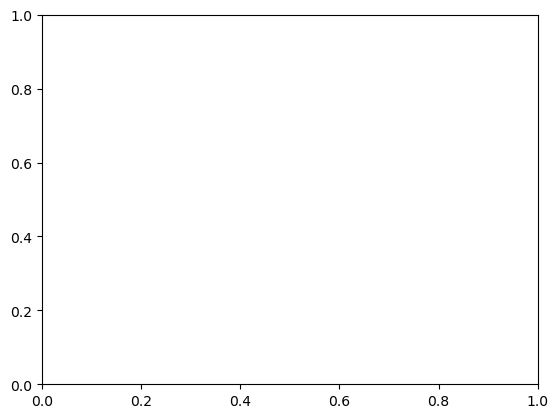

In [17]:
plt.scatter(X_test_scaled, y_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

In [261]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [262]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y_test, predicted_y_values)
mse = mean_squared_error(y_test, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is -47021069.28380769.
The r2 is -0.020516519158267688.
The mean squared error is 210.74113210699187.
The root mean squared error is 14.51692571128584.
The standard deviation is 14.370260297488645.


c:\Users\mrybi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [200]:
health_df_cor = pd.get_dummies(health_df)
print(health_df_cor.corr())

                                            year  prevalence_rate  \
year                                    1.000000        -0.000818   
prevalence_rate                        -0.000818         1.000000   
incidence_rate                         -0.000944         0.000338   
mortality_rate                          0.000448         0.001284   
population_affected                     0.000686         0.000622   
...                                          ...              ...   
treatment_type_Surgery                  0.001531        -0.000115   
treatment_type_Therapy                 -0.002078         0.000086   
treatment_type_Vaccination              0.001495        -0.000846   
availability_of_vaccines_treatment_No   0.002404         0.000062   
availability_of_vaccines_treatment_Yes -0.002404        -0.000062   

                                        incidence_rate  mortality_rate  \
year                                         -0.000944        0.000448   
prevalence_rate        

<Axes: >

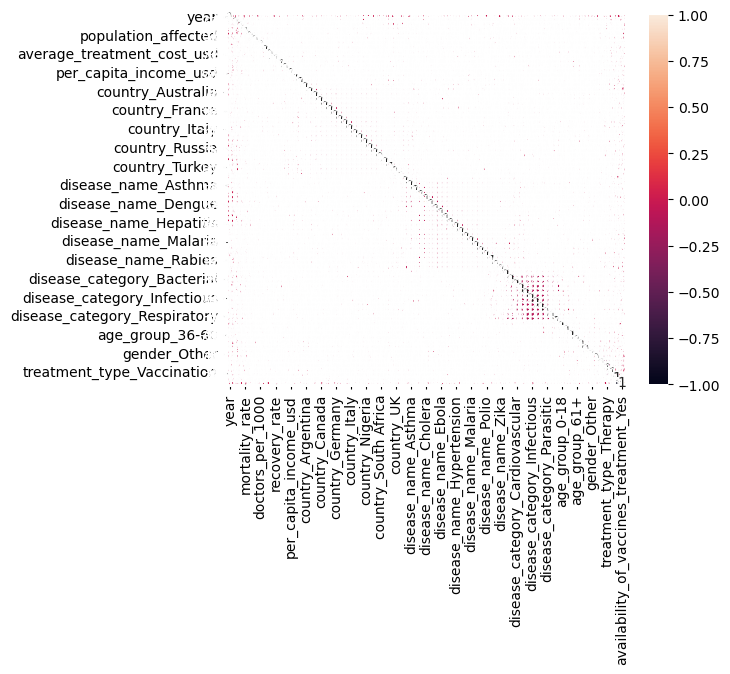

In [78]:
import seaborn as sns
sns.heatmap(health_df_cor.corr(), annot=True)

In [201]:
print(respiratory_health_df.corr(numeric_only=True))

                                year  prevalence_rate  incidence_rate  \
year                        1.000000        -0.002725       -0.014335   
prevalence_rate            -0.002725         1.000000       -0.020728   
incidence_rate             -0.014335        -0.020728        1.000000   
mortality_rate             -0.024201         0.003698        0.003160   
population_affected         0.021013        -0.004990       -0.005419   
healthcare_access           0.014755         0.012354       -0.008634   
doctors_per_1000            0.017064        -0.023464       -0.022524   
hospital_beds_per_1000     -0.000733        -0.001296        0.023432   
average_treatment_cost_usd  0.035217         0.024685        0.010122   
recovery_rate               0.006067        -0.007171        0.013753   
dalys                       0.013525         0.006692        0.002314   
improvement_in_5_years      0.000831         0.016067        0.028722   
per_capita_income_usd       0.025818         0.0055

In [202]:
health_df_dummies = pd.get_dummies(respiratory_health_df)

In [203]:
correlation_matrix = health_df_dummies.corr()
print(correlation_matrix)

                                            year  prevalence_rate  \
year                                    1.000000        -0.002725   
prevalence_rate                        -0.002725         1.000000   
incidence_rate                         -0.014335        -0.020728   
mortality_rate                         -0.024201         0.003698   
population_affected                     0.021013        -0.004990   
healthcare_access                       0.014755         0.012354   
doctors_per_1000                        0.017064        -0.023464   
hospital_beds_per_1000                 -0.000733        -0.001296   
average_treatment_cost_usd              0.035217         0.024685   
recovery_rate                           0.006067        -0.007171   
dalys                                   0.013525         0.006692   
improvement_in_5_years                  0.000831         0.016067   
per_capita_income_usd                   0.025818         0.005560   
education_index                   

In [204]:
target_correlation = correlation_matrix['recovery_rate'].abs().sort_values(ascending=False)
print(target_correlation)

recovery_rate                             1.000000
per_capita_income_usd                     0.035843
age_group_36-60                           0.031576
disease_name_COVID-19                     0.029332
doctors_per_1000                          0.026087
disease_name_Ebola                        0.025503
treatment_type_Therapy                    0.024728
treatment_type_Vaccination                0.022050
dalys                                     0.021389
disease_name_Dengue                       0.020215
disease_name_Tuberculosis                 0.017540
education_index                           0.016563
disease_name_Asthma                       0.016181
age_group_0-18                            0.015436
disease_name_Diabetes                     0.015351
disease_name_Zika                         0.015314
average_treatment_cost_usd                0.014104
healthcare_access                         0.014095
disease_name_Influenza                    0.013904
incidence_rate                 

In [ ]:
we